In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bankdata = pd.read_csv("C:\\Users\\ONEEKA\\Downloads\\bill_authentication.csv")

In [3]:
bankdata.shape

(1372, 5)

In [4]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [7]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
y_pred = svclassifier.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[158   1]
 [  0 116]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       159
           1       0.99      1.00      1.00       116

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



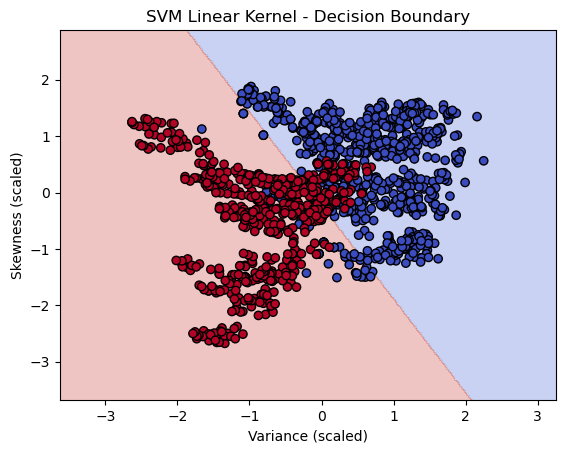

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Select only 2 features for visualization (Variance & Skewness for example)
X_plot = bankdata[["Variance", "Skewness"]].values
y_plot = bankdata["Class"].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_plot)

# Train linear SVM on 2D data
clf = SVC(kernel="linear")
clf.fit(X_scaled, y_plot)

# Create mesh grid for decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict over the grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_plot, cmap=plt.cm.coolwarm, edgecolors="k")
plt.xlabel("Variance (scaled)")
plt.ylabel("Skewness (scaled)")
plt.title("SVM Linear Kernel - Decision Boundary")
plt.show()
